In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing


In [15]:
print(monthly_completions.tail(6))


CompletionDate
2025-01-31    3
2025-02-28    2
2025-03-31    5
2025-04-30    3
2025-05-31    1
2025-06-30    3
Freq: M, dtype: int64


In [22]:
pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/625.1 kB 393.8 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/625.1 kB 731.4 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/625.1 kB 821.4 kB/s eta 0:00:01
   ---------------- ----------------------- 256.0/625.1 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/625.1 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/625.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 4.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.7 MB 4.3 MB/s eta 0:00

- Forecasting: Predict training completions for next Quarter Using SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=233.410, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=222.527, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=224.567, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=231.410, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=226.715, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=219.818, Time=0.11 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=221.823, Time=0.09 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=231.173, Time=0.09 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=221.690, Time=0.16 sec
 ARIMA(1,0,1)(2,1,0)[4] intercept   : AIC=221.736, Time=0.19 sec
 ARIMA(0,0,1)(2,1,0)[4] intercept   : AIC=225.733, Time=0.15 sec
 ARIMA(2,0,1)(2,1,0)[4] intercept   : AIC=222.101, Time=0.24 sec
 ARIMA(1,0,0)(2,1,0)[4]             : AIC=217.826, Time

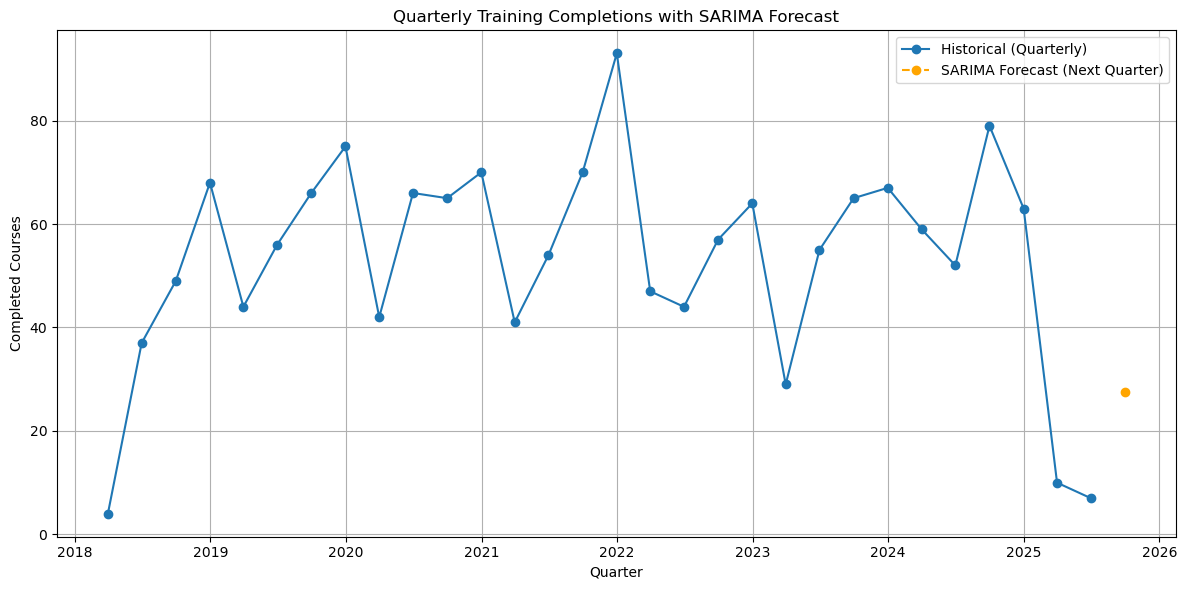

SARIMA Forecast for Next Quarter: 2025-09-30    27.46
Freq: Q-DEC, dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# 1. Load and preprocess
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# 2. Group by quarter
quarterly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Q')).size()
quarterly_completions = quarterly_completions.asfreq('Q').fillna(0)

# 3. Fit SARIMA (auto ARIMA with seasonality)
model = pm.auto_arima(quarterly_completions,
                      seasonal=True,
                      m=4,  # 4 quarters in a year
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# 4. Forecast next quarter
n_periods = 1
forecast = model.predict(n_periods=n_periods)
forecast_index = pd.date_range(start=quarterly_completions.index[-1] + pd.offsets.QuarterEnd(),
                               periods=n_periods, freq='Q')
forecast_series = pd.Series(forecast, index=forecast_index)

# 5. Plot
plt.figure(figsize=(12, 6))
plt.plot(quarterly_completions, label="Historical (Quarterly)", marker='o')
plt.plot(forecast_series, label="SARIMA Forecast (Next Quarter)", linestyle='--', marker='o', color='orange')
plt.title("Quarterly Training Completions with SARIMA Forecast")
plt.ylabel("Completed Courses")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print Forecast
print("SARIMA Forecast for Next Quarter:", forecast_series.round(2))


- Predtiction Comparison Only for SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=138.112, Time=0.00 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=131.558, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=136.810, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=133.363, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=132.234, Time=0.16 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=138.248, Time=0.04 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=132.979, Time=0.09 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(1,1,0)[4] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(

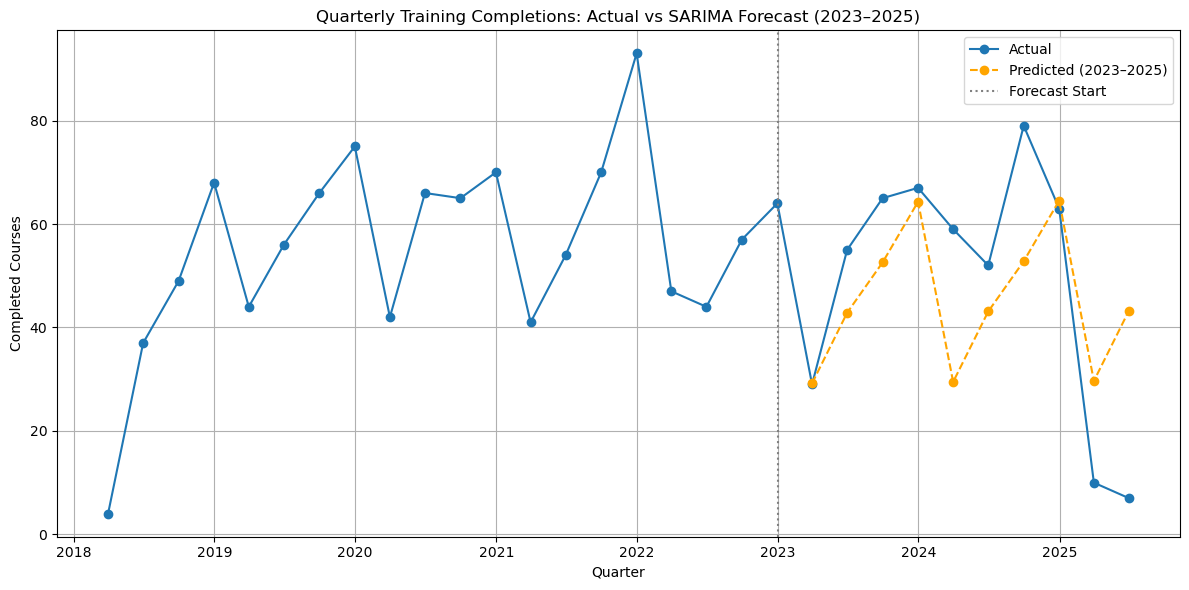


Forecast vs Actuals (2023–2025):
     Quarter  Actual  Predicted
0 2023-03-31      29       29.2
1 2023-06-30      55       42.8
2 2023-09-30      65       52.6
3 2023-12-31      67       64.3
4 2024-03-31      59       29.5
5 2024-06-30      52       43.1
6 2024-09-30      79       52.8
7 2024-12-31      63       64.5
8 2025-03-31      10       29.7
9 2025-06-30       7       43.3


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_absolute_error

# 1. Load and preprocess
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# 2. Group by quarter
quarterly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Q')).size()
quarterly_completions = quarterly_completions.asfreq('Q').fillna(0)

# 3. Split: Use data before 2023 for training
train = quarterly_completions[quarterly_completions.index < '2023-01-01']
test = quarterly_completions[(quarterly_completions.index >= '2023-01-01') & (quarterly_completions.index < '2026-01-01')]

# 4. Fit SARIMA
model = pm.auto_arima(train,
                      seasonal=True,
                      m=4,  # Quarterly seasonality
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# 5. Forecast 12 quarters (2023–2025)
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast_index = pd.date_range(start=train.index[-1] + pd.offsets.QuarterEnd(), periods=n_periods, freq='Q')
forecast_series = pd.Series(forecast, index=forecast_index)

# 6. Compute MAE
mae = mean_absolute_error(test, forecast_series)
print(f"MAE for 2023–2025 forecast: {mae:.2f}")

# 7. Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(quarterly_completions, label="Actual", marker='o')
plt.plot(forecast_series, label="Predicted (2023–2025)", linestyle='--', marker='o', color='orange')
plt.axvline(x=pd.to_datetime('2023-01-01'), color='gray', linestyle=':', label="Forecast Start")
plt.title("Quarterly Training Completions: Actual vs SARIMA Forecast (2023–2025)")
plt.ylabel("Completed Courses")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Optional: Print comparison table
comparison_df = pd.DataFrame({
    'Quarter': test.index,
    'Actual': test.values,
    'Predicted': forecast_series.values
})
print("\nForecast vs Actuals (2023–2025):")
print(comparison_df.round(1))


- Predtiction Comparison Only for PROPHET

13:26:53 - cmdstanpy - INFO - Chain [1] start processing
13:26:53 - cmdstanpy - INFO - Chain [1] done processing


MAE for 2023–2025 forecast: 18.94


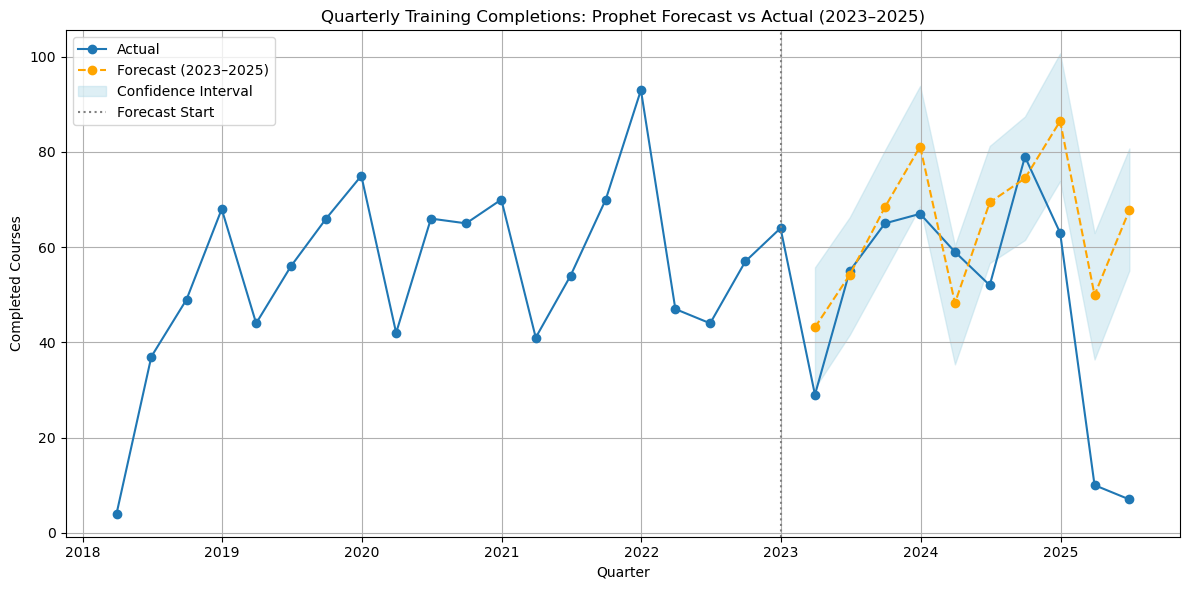


Forecast vs Actuals (2023–2025):
     Quarter  Actual  Predicted
0 2023-03-31      29       43.1
1 2023-06-30      55       54.2
2 2023-09-30      65       68.4
3 2023-12-31      67       81.1
4 2024-03-31      59       48.3
5 2024-06-30      52       69.4
6 2024-09-30      79       74.4
7 2024-12-31      63       86.5
8 2025-03-31      10       49.9
9 2025-06-30       7       67.8


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# 1. Load and preprocess
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# 2. Group by quarter
quarterly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Q')).size().reset_index(name='y')
quarterly_completions.rename(columns={'CompletionDate': 'ds'}, inplace=True)

# 3. Split into train and test
train = quarterly_completions[quarterly_completions['ds'] < '2023-01-01']
test = quarterly_completions[(quarterly_completions['ds'] >= '2023-01-01') & (quarterly_completions['ds'] < '2026-01-01')]

# 4. Fit Prophet model
model = Prophet()
model.fit(train)

# 5. Create future dataframe for 12 quarters (3 years)
future = model.make_future_dataframe(periods=12, freq='Q')
forecast = model.predict(future)

# 6. Extract predictions for test range
forecast_test = forecast.set_index('ds').loc[test['ds']]
y_pred = forecast_test['yhat'].values
y_true = test['y'].values

# 7. MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"MAE for 2023–2025 forecast: {mae:.2f}")

# 8. Plot Actual vs Forecasted
plt.figure(figsize=(12, 6))
plt.plot(quarterly_completions['ds'], quarterly_completions['y'], label='Actual', marker='o')
plt.plot(forecast_test.index, forecast_test['yhat'], label='Forecast (2023–2025)', linestyle='--', marker='o', color='orange')
plt.fill_between(forecast_test.index,
                 forecast_test['yhat_lower'],
                 forecast_test['yhat_upper'],
                 color='lightblue', alpha=0.4, label='Confidence Interval')
plt.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle=':', label='Forecast Start')
plt.title("Quarterly Training Completions: Prophet Forecast vs Actual (2023–2025)")
plt.xlabel("Quarter")
plt.ylabel("Completed Courses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Optional: Print comparison table
comparison_df = pd.DataFrame({
    'Quarter': test['ds'].values,
    'Actual': y_true,
    'Predicted': y_pred
})
print("\nForecast vs Actuals (2023–2025):")
print(comparison_df.round(1))


- Predtiction Comparison For Both SARIMA nad PROPHET

13:42:55 - cmdstanpy - INFO - Chain [1] start processing
13:42:55 - cmdstanpy - INFO - Chain [1] done processing


MAE - SARIMA: 14.95
MAE - Prophet: 18.94


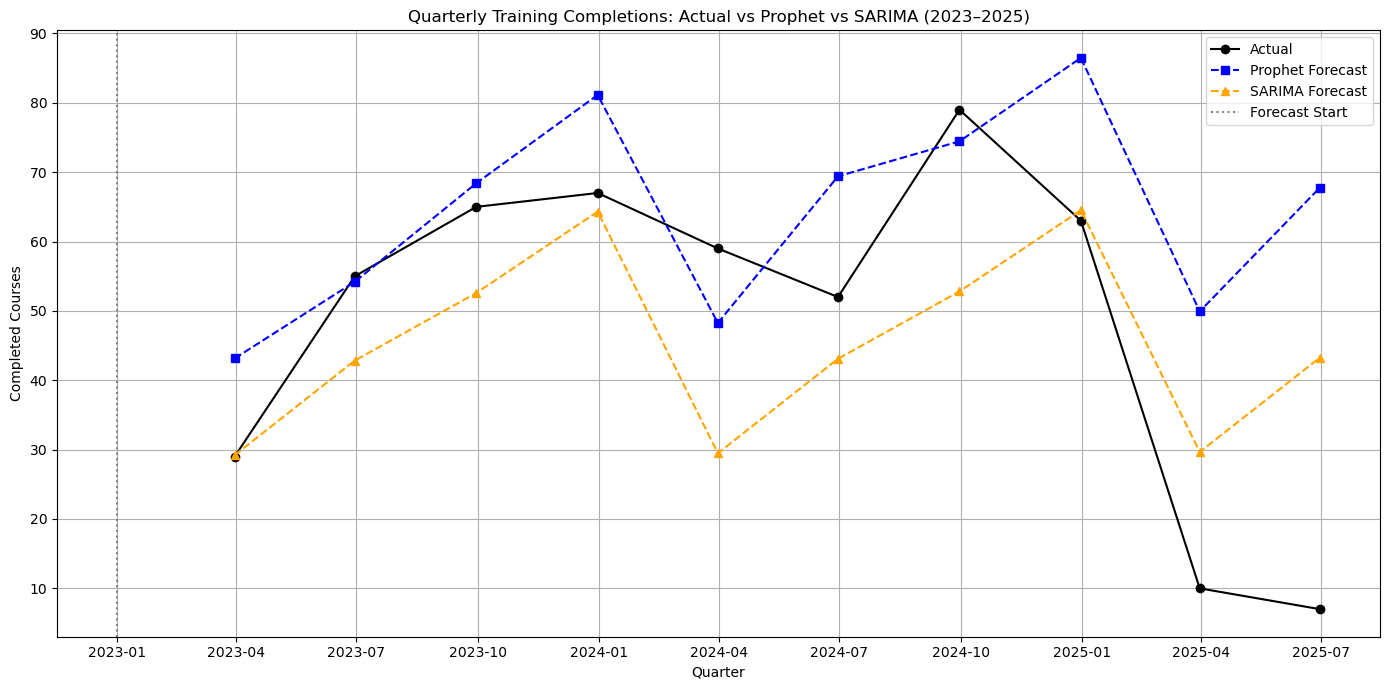


Forecast Comparison (2023–2025):
     Quarter  Actual  Prophet  SARIMA
0 2023-03-31      29     43.1    29.2
1 2023-06-30      55     54.2    42.8
2 2023-09-30      65     68.4    52.6
3 2023-12-31      67     81.1    64.3
4 2024-03-31      59     48.3    29.5
5 2024-06-30      52     69.4    43.1
6 2024-09-30      79     74.4    52.8
7 2024-12-31      63     86.5    64.5
8 2025-03-31      10     49.9    29.7
9 2025-06-30       7     67.8    43.3


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# ------------------------------
# 2. Group by quarter
# ------------------------------
quarterly_completions = completed_df.groupby(
    pd.Grouper(key='CompletionDate', freq='Q')
).size().reset_index(name='y')
quarterly_completions.rename(columns={'CompletionDate': 'ds'}, inplace=True)

# ------------------------------
# 3. Train/test split (2023–2025)
# ------------------------------
train = quarterly_completions[quarterly_completions['ds'] < '2023-01-01']
test = quarterly_completions[(quarterly_completions['ds'] >= '2023-01-01') & (quarterly_completions['ds'] < '2026-01-01')]

# ------------------------------------------------------------
# 4. SARIMA Forecasting (train only on pre-2023)
# ------------------------------------------------------------
train_sarima = train.set_index('ds')['y']
test_sarima = test.set_index('ds')['y']

model_sarima = pm.auto_arima(train_sarima, seasonal=True, m=4, trace=False, suppress_warnings=True, stepwise=True)
forecast_sarima_values = model_sarima.predict(n_periods=len(test_sarima))
forecast_sarima = pd.Series(forecast_sarima_values, index=test_sarima.index)

# ------------------------------------------------------------
# 5. Prophet Forecasting
# ------------------------------------------------------------
model_prophet = Prophet()
model_prophet.fit(train)

future = model_prophet.make_future_dataframe(periods=12, freq='Q')  # 12 quarters = 3 years
forecast_prophet_full = model_prophet.predict(future)
forecast_prophet = forecast_prophet_full.set_index('ds').loc[test['ds']]
forecast_prophet_series = pd.Series(forecast_prophet['yhat'].values, index=forecast_prophet.index)

# ------------------------------
# 6. Evaluation
# ------------------------------
mae_sarima = mean_absolute_error(test_sarima, forecast_sarima)
mae_prophet = mean_absolute_error(test_sarima, forecast_prophet_series)

print(f"MAE - SARIMA: {mae_sarima:.2f}")
print(f"MAE - Prophet: {mae_prophet:.2f}")

# ------------------------------
# 7. Combined Plot
# ------------------------------
plt.figure(figsize=(14, 7))

# Actual
plt.plot(test_sarima.index, test_sarima.values, label="Actual", marker='o', color='black')

# Prophet
plt.plot(forecast_prophet_series.index, forecast_prophet_series.values,
         label="Prophet Forecast", linestyle='--', marker='s', color='blue')

# SARIMA
plt.plot(forecast_sarima.index, forecast_sarima.values,
         label="SARIMA Forecast", linestyle='--', marker='^', color='orange')

plt.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle=':', label="Forecast Start")
plt.title("Quarterly Training Completions: Actual vs Prophet vs SARIMA (2023–2025)")
plt.xlabel("Quarter")
plt.ylabel("Completed Courses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# 8. Comparison Table
# ------------------------------
comparison_df = pd.DataFrame({
    'Quarter': test_sarima.index,
    'Actual': test_sarima.values,
    'Prophet': forecast_prophet_series.values,
    'SARIMA': forecast_sarima.values
})

print("\nForecast Comparison (2023–2025):")
print(comparison_df.round(1))


- Forecasting: Predict training completions for next 3 months Using SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=600.859, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=562.555, Time=0.28 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=575.949, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=774.794, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=564.539, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=564.387, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=562.757, Time=0.12 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=597.337, Time=0.13 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=563.243, Time=0.28 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=563.403, Time=0.27 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=575.376, Time=0.16 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=56

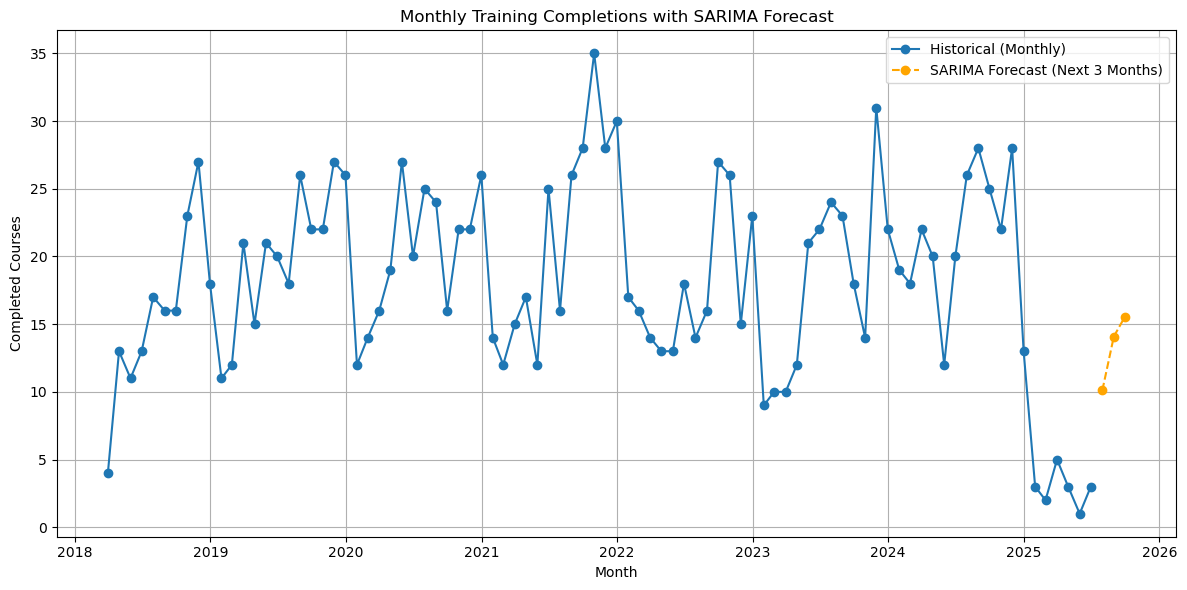

SARIMA Forecast for Q3 2025 (Monthly model):
2025-07-31    10.10
2025-08-31    14.09
2025-09-30    15.55
Freq: M, dtype: float64

Total Forecasted Completions for Q3 2025: 39.74


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# 1. Load dataset
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")

# 2. Convert CompletionDate to datetime
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')

# 3. Filter only completed courses
completed_df = df[df['CompletionStatus'] == 1]

# 4. Group by month and count completions
monthly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='M')).size()
monthly_completions = monthly_completions.asfreq('M').fillna(0)

# 5. Fit SARIMA model to monthly data
model = pm.auto_arima(monthly_completions,
                      seasonal=True,
                      m=12,  # 12 months in a year
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# 6. Forecast the next 3 months (Q3: July, August, September)
n_months = 3
forecast = model.predict(n_periods=n_months)

# 7. Create date index for forecast
forecast_index = pd.date_range(start=monthly_completions.index[-1] + pd.offsets.MonthEnd(), 
                               periods=n_months, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# 8. Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_completions, label="Historical (Monthly)", marker='o')
plt.plot(forecast_series, label="SARIMA Forecast (Next 3 Months)", linestyle='--', marker='o', color='orange')
plt.title("Monthly Training Completions with SARIMA Forecast")
plt.ylabel("Completed Courses")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Print forecasted values
print("SARIMA Forecast for Q3 2025 (Monthly model):")
print(forecast_series.round(2))

# 10. Print total forecast for Q3
total_q3 = forecast_series.sum()
print(f"\nTotal Forecasted Completions for Q3 2025: {total_q3:.2f}")


- Forecasting: Predict training completions for next 6 Quarter Using SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=233.410, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=222.527, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=224.567, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=231.410, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=226.715, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=219.818, Time=0.12 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=221.823, Time=0.11 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=231.173, Time=0.16 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=221.690, Time=0.19 sec
 ARIMA(1,0,1)(2,1,0)[4] intercept   : AIC=221.736, Time=0.23 sec
 ARIMA(0,0,1)(2,1,0)[4] intercept   : AIC=225.733, Time=0.18 sec
 ARIMA(2,0,1)(2,1,0)[4] intercept   : AIC=222.101, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[4]             : AIC=217.826, Time

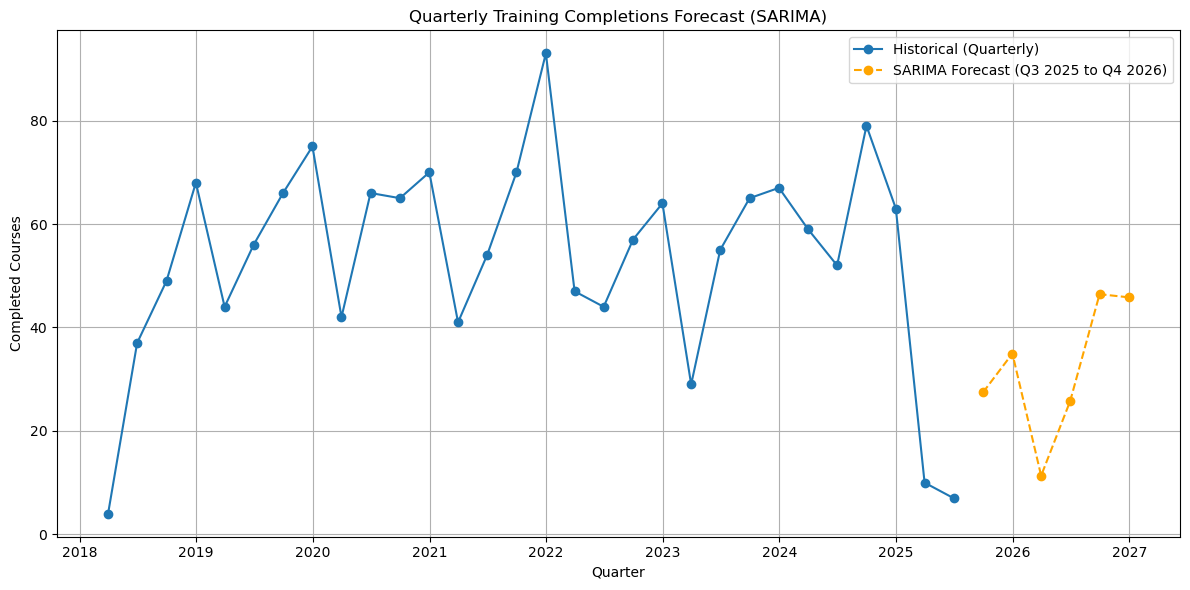

SARIMA Forecast (Q3 2025 to Q4 2026):
2025-09-30    27.46
2025-12-31    34.97
2026-03-31    11.35
2026-06-30    25.79
2026-09-30    46.44
2026-12-31    45.83
Freq: Q-DEC, dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# 1. Load and preprocess
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# 2. Group by quarter
quarterly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Q')).size()
quarterly_completions = quarterly_completions.asfreq('Q').fillna(0)

# 3. Fit SARIMA (auto ARIMA with seasonality)
model = pm.auto_arima(quarterly_completions,
                      seasonal=True,
                      m=4,  # 4 quarters in a year
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# 4. Forecast next 6 quarters (up to Q4 FY26)
n_periods = 6
forecast = model.predict(n_periods=n_periods)
forecast_index = pd.date_range(start=quarterly_completions.index[-1] + pd.offsets.QuarterEnd(),
                               periods=n_periods, freq='Q')
forecast_series = pd.Series(forecast, index=forecast_index)

# 5. Combine full timeline
full_series = pd.concat([quarterly_completions, forecast_series])

# 6. Plot
plt.figure(figsize=(12, 6))
plt.plot(quarterly_completions, label="Historical (Quarterly)", marker='o')
plt.plot(forecast_series, label="SARIMA Forecast (Q3 2025 to Q4 2026)", linestyle='--', marker='o', color='orange')
plt.title("Quarterly Training Completions Forecast (SARIMA)")
plt.ylabel("Completed Courses")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Print forecasted values
print("SARIMA Forecast (Q3 2025 to Q4 2026):")
print(forecast_series.round(2))


- Forecasting: Predict training completions Yearly Using SARIMA

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=110.519, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=100.338, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=102.111, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=104.109, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.288, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.846, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.409 seconds


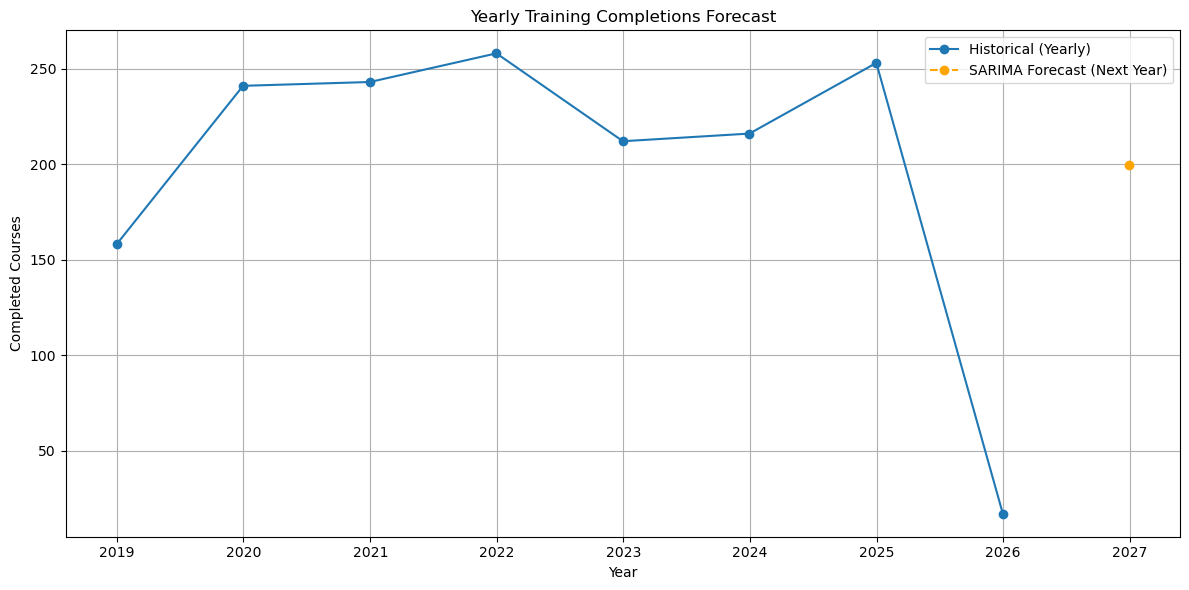

SARIMA Forecast for Next Year:
2026-12-31    199.75
Freq: A-DEC, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# 1. Load and preprocess
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# 2. Group by year instead of quarter
yearly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Y')).size()
yearly_completions = yearly_completions.asfreq('Y').fillna(0)

# 3. Fit SARIMA model (m=1 because it's yearly)
model = pm.auto_arima(yearly_completions,
                      seasonal=False,  # usually no seasonality for yearly
                      m=1,  # 1 year per cycle
                      trace=True,
                      suppress_warnings=True,
                      stepwise=True)

# 4. Forecast next year (or more, e.g., 2 years)
n_years = 1
forecast = model.predict(n_periods=n_years)
forecast_index = pd.date_range(start=yearly_completions.index[-1] + pd.offsets.YearEnd(),
                               periods=n_years, freq='Y')
forecast_series = pd.Series(forecast, index=forecast_index)

# 5. Plot the result
plt.figure(figsize=(12, 6))
plt.plot(yearly_completions, label="Historical (Yearly)", marker='o')
plt.plot(forecast_series, label="SARIMA Forecast (Next Year)", linestyle='--', marker='o', color='orange')
plt.title("Yearly Training Completions Forecast")
plt.ylabel("Completed Courses")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print the forecast
print("SARIMA Forecast for Next Year:")
print(forecast_series.round(2))


- Yearly comparison between SARIMA and Prohphet

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=62.221, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70.279, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=59.214, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55.369, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.448, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=54.308, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=63.048, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.453 seconds


13:49:26 - cmdstanpy - INFO - Chain [1] start processing
13:49:26 - cmdstanpy - INFO - Chain [1] done processing


MAE - SARIMA (Yearly): 79.27
MAE - Prophet (Yearly): 106.63


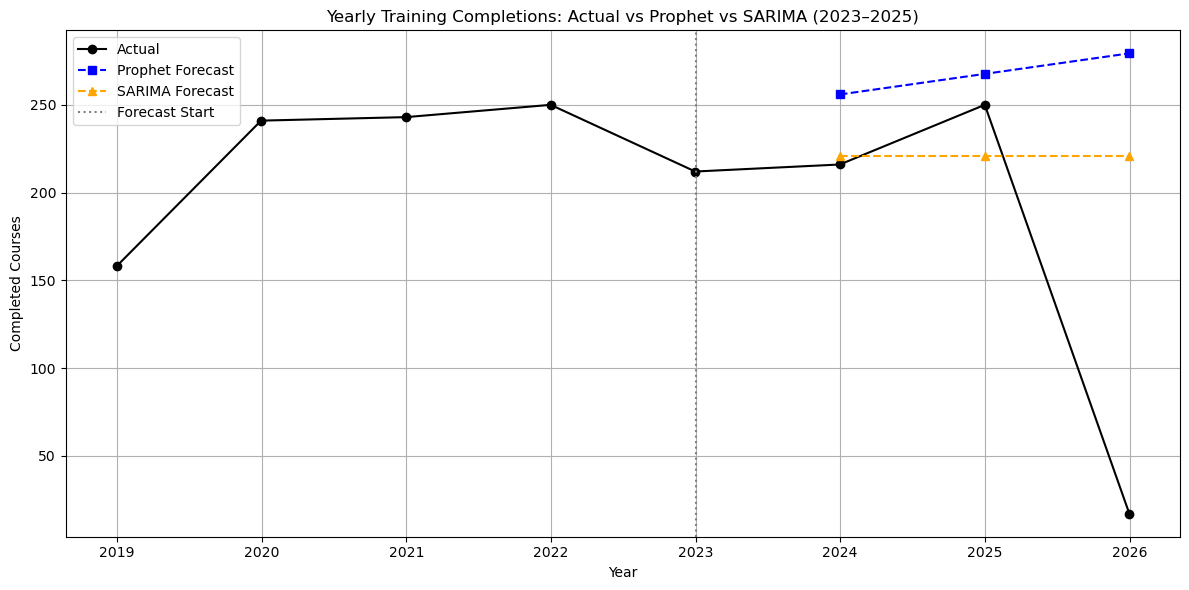


Forecast Comparison (2023–2025):
   Year  Actual  Prophet  SARIMA
0  2023     216    255.9   220.8
1  2024     250    267.6   220.8
2  2025      17    279.3   220.8


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# ------------------------------
# 1. Load and preprocess
# ------------------------------
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], errors='coerce')
completed_df = df[df['CompletionStatus'] == 1]

# ------------------------------
# 2. Group by year
# ------------------------------
yearly_completions = completed_df.groupby(pd.Grouper(key='CompletionDate', freq='Y')).size().reset_index(name='y')
yearly_completions.rename(columns={'CompletionDate': 'ds'}, inplace=True)

# ------------------------------
# 3. Cap high values if needed 
# ------------------------------
yearly_completions['y'] = yearly_completions['y'].clip(upper=250)

# ------------------------------
# 4. Train-test split
# ------------------------------
train = yearly_completions[yearly_completions['ds'] < '2023-01-01']
test = yearly_completions[
    (yearly_completions['ds'] >= '2023-01-01') &
    (yearly_completions['ds'] < '2026-01-01')
]

# ------------------------------------------------------------
# 5. SARIMA Forecasting
# ------------------------------------------------------------
train_sarima = train.set_index('ds')['y']
test_sarima = test.set_index('ds')['y']

model_sarima = pm.auto_arima(train_sarima,
                              seasonal=False,  
                              m=1,
                              trace=True,
                              suppress_warnings=True,
                              stepwise=True)

forecast_sarima_values = model_sarima.predict(n_periods=len(test_sarima))
forecast_sarima = pd.Series(forecast_sarima_values, index=test_sarima.index)

# ------------------------------------------------------------
# 6. Prophet Forecasting
# ------------------------------------------------------------
model_prophet = Prophet(yearly_seasonality=False)
model_prophet.fit(train)

future = model_prophet.make_future_dataframe(periods=len(test), freq='Y')
forecast_prophet_full = model_prophet.predict(future)
forecast_prophet = forecast_prophet_full.set_index('ds').loc[test['ds']]
forecast_prophet_series = pd.Series(forecast_prophet['yhat'].values, index=forecast_prophet.index)

# ------------------------------
# 7. Evaluation
# ------------------------------
mae_sarima = mean_absolute_error(test_sarima, forecast_sarima)
mae_prophet = mean_absolute_error(test_sarima, forecast_prophet_series)

print(f"MAE - SARIMA (Yearly): {mae_sarima:.2f}")
print(f"MAE - Prophet (Yearly): {mae_prophet:.2f}")

# ------------------------------
# 8. Combined Plot
# ------------------------------
plt.figure(figsize=(12, 6))

# Plot all actual data
plt.plot(yearly_completions['ds'], yearly_completions['y'], label="Actual", marker='o', color='black')

# Prophet forecast
plt.plot(forecast_prophet_series.index, forecast_prophet_series.values,
         label="Prophet Forecast", linestyle='--', marker='s', color='blue')

# SARIMA forecast
plt.plot(forecast_sarima.index, forecast_sarima.values,
         label="SARIMA Forecast", linestyle='--', marker='^', color='orange')

plt.axvline(pd.to_datetime('2023-01-01'), color='gray', linestyle=':', label="Forecast Start")
plt.title("Yearly Training Completions: Actual vs Prophet vs SARIMA (2023–2025)")
plt.xlabel("Year")
plt.ylabel("Completed Courses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# 9. Forecast Comparison Table
# ------------------------------
comparison_df = pd.DataFrame({
    'Year': test_sarima.index.year,
    'Actual': test_sarima.values,
    'Prophet': forecast_prophet_series.values,
    'SARIMA': forecast_sarima.values
})

print("\nForecast Comparison (2023–2025):")
print(comparison_df.round(1))


- Regression Analysis: Model impact of training time and frequency on performance scores Using Skill Scores


Linear Regression Results (Trained on Full Data)
Intercept                : 2.97
DurationMinutes Coef     : 0.0007
CourseFrequency Coef     : -0.0041


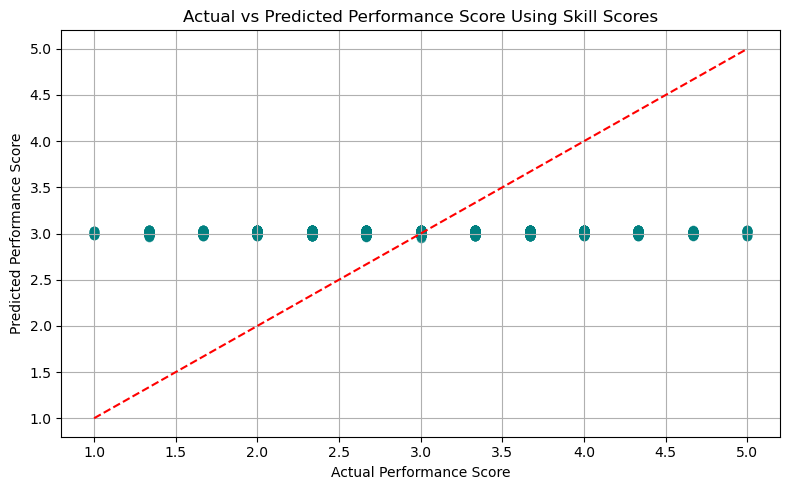

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")

# 2. Keep only completed trainings
completed_df = df[df['CompletionStatus'] == 1]

# 3. Count total course completions per employee (including repeats)
course_counts = completed_df.groupby('EmployeeID').size().reset_index(name='CourseFrequency')

# 4. Merge course frequency back into main DataFrame
df = pd.merge(df, course_counts, on='EmployeeID', how='left')

# 5. Compute performance score (average of 3 skill scores)
df['PerformanceScore'] = df[['SkillScore_Communication',
                             'SkillScore_TechEfficiency',
                             'SkillScore_Teamwork']].mean(axis=1)

# 6. Drop rows with missing values for regression
df_model = df[['DurationMinutes', 'CourseFrequency', 'PerformanceScore']].dropna()

# 7. Define features (X) and target (y)
X = df_model[['DurationMinutes', 'CourseFrequency']]
y = df_model['PerformanceScore']

# 8. Fit Linear Regression model on full data
reg = LinearRegression()
reg.fit(X, y)

# 9. Predict on the same data (for visualization only)
y_pred = reg.predict(X)

# 10. Output Results
print("\nLinear Regression Results (Trained on Full Data)")
print(f"Intercept                : {reg.intercept_:.2f}")
print(f"DurationMinutes Coef     : {reg.coef_[0]:.4f}")
print(f"CourseFrequency Coef     : {reg.coef_[1]:.4f}")

# 11. Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score Using Skill Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


- Regression Analysis: Model impact of training time and frequency on performance scores using only score


Linear Regression Results
Intercept                : 79.55
DurationMinutes Coef     : -0.0001
CourseFrequency Coef     : 0.2553


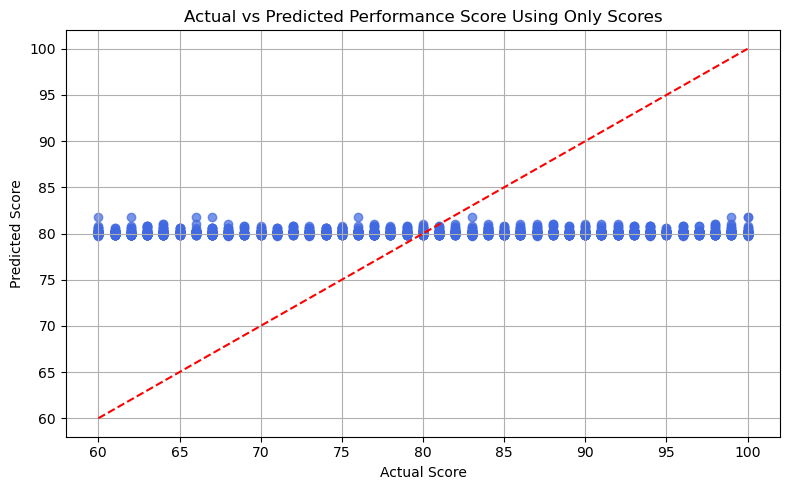

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_excel("RCHG_LMS_Dataset_powerBI_Updated.xlsx")

# 2. Keep only completed trainings
completed_df = df[df['CompletionStatus'] == 1]

# 3. Count total course completions per employee
course_counts = completed_df.groupby('EmployeeID').size().reset_index(name='CourseFrequency')

# 4. Merge course frequency back into main DataFrame
df = pd.merge(df, course_counts, on='EmployeeID', how='left')

# 5. Drop rows with missing values for regression
df_model = df[['DurationMinutes', 'CourseFrequency', 'Score']].dropna()

# 6. Define features (X) and target (y)
X = df_model[['DurationMinutes', 'CourseFrequency']]
y = df_model['Score']

# 7. Fit Linear Regression model on full data
reg = LinearRegression()
reg.fit(X, y)

# 8. Predict on the same data (for visualization only)
y_pred = reg.predict(X)

# 9. Output Results
print("\nLinear Regression Results")
print(f"Intercept                : {reg.intercept_:.2f}")
print(f"DurationMinutes Coef     : {reg.coef_[0]:.4f}")
print(f"CourseFrequency Coef     : {reg.coef_[1]:.4f}")

# 10. Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Performance Score Using Only Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


- ANOVA: Compare mean skill scores across multiple departments to identify statistically significant performance disparities

In [30]:
import pandas as pd
from scipy.stats import f_oneway

# Load all sheets
xls = pd.ExcelFile("RCHG_LMS_Dataset_powerBI_Updated.xlsx")
df_fact = pd.read_excel(xls, sheet_name="LMSFact")
df_emp = pd.read_excel(xls, sheet_name="Employee")
df_team = pd.read_excel(xls, sheet_name="Team")

# Step 1: Merge LMSFact with Employee to get TeamID
df = pd.merge(df_fact, df_emp[['EmployeeID', 'TeamID']], on='EmployeeID', how='left')

# Step 2: Merge with Team sheet to get actual team names
df = pd.merge(df, df_team[['TeamID', 'Teams']], on='TeamID', how='left')

# Step 3: Compute average performance score
df['PerformanceScore'] = df[['SkillScore_Communication', 'SkillScore_TechEfficiency', 'SkillScore_Teamwork']].mean(axis=1)

# Step 4: Drop rows with missing team or performance score
df = df[['Teams', 'PerformanceScore']].dropna()

# Step 5: Group performance scores by team
grouped_scores = df.groupby('Teams')['PerformanceScore'].apply(list)

# Step 6: Perform one-way ANOVA
anova_result = f_oneway(*grouped_scores)

# Output
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Conclusion: There is a statistically significant difference in performance scores between teams.")
else:
    print("Conclusion: No significant difference in performance scores between teams.")


ANOVA Results:
F-statistic: 0.7911
P-value: 0.5560
Conclusion: No significant difference in performance scores between teams.


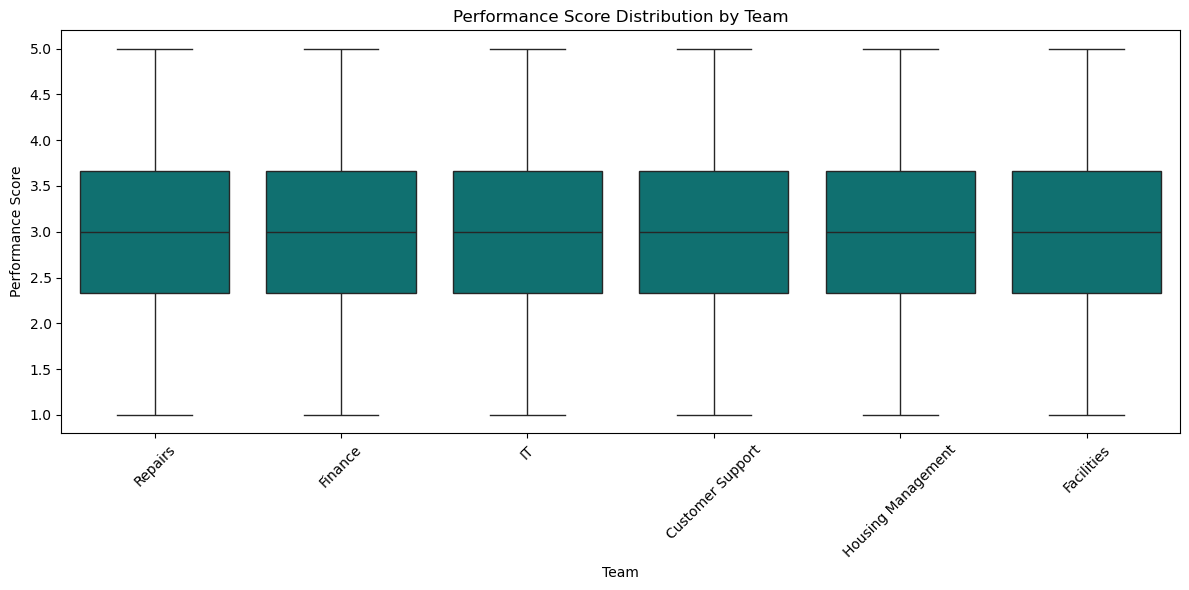

In [35]:
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(x='Teams', y='PerformanceScore', data=df, color='teal')
plt.title("Performance Score Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [36]:
import pandas as pd
from scipy.stats import f_oneway

# 1. Load your Excel file
xls = pd.ExcelFile("RCHG_LMS_Dataset_powerBI_Updated.xlsx")

# 2. Load sheets
df_fact = pd.read_excel(xls, sheet_name="LMSFact")
df_emp = pd.read_excel(xls, sheet_name="Employee")
df_team = pd.read_excel(xls, sheet_name="Team")

# 3. Merge LMSFact with Employee to get TeamID
df = pd.merge(df_fact, df_emp[['EmployeeID', 'TeamID']], on='EmployeeID', how='left')

# 4. Merge with Team to get readable Team names (if you want)
df = pd.merge(df, df_team, on='TeamID', how='left')

# 5. Drop missing team data
df = df.dropna(subset=["TeamID"])

# 6. Now perform ANOVA for each skill score
for skill in ['SkillScore_Communication', 'SkillScore_TechEfficiency', 'SkillScore_Teamwork']:
    print(f"\n--- ANOVA for {skill} ---")
    # Group by team
    grouped = df.groupby("TeamID")[skill].apply(list)
    
    # Drop groups with too few members to avoid crash
    grouped = grouped[grouped.apply(lambda x: len(x) > 1)]

    # Perform one-way ANOVA
    stat, pvalue = f_oneway(*grouped)

    # Print results
    print(f"F-statistic: {stat:.2f}")
    print(f"p-value: {pvalue:.4f}")
    
    # Interpretation
    if pvalue < 0.05:
        print("Result: Reject null hypothesis — There is a significant difference between teams.")
    else:
        print("Result: Fail to reject null hypothesis — No significant difference between teams.")



--- ANOVA for SkillScore_Communication ---
F-statistic: 1.31
p-value: 0.2554
Result: Fail to reject null hypothesis — No significant difference between teams.

--- ANOVA for SkillScore_TechEfficiency ---
F-statistic: 0.18
p-value: 0.9688
Result: Fail to reject null hypothesis — No significant difference between teams.

--- ANOVA for SkillScore_Teamwork ---
F-statistic: 0.33
p-value: 0.8974
Result: Fail to reject null hypothesis — No significant difference between teams.


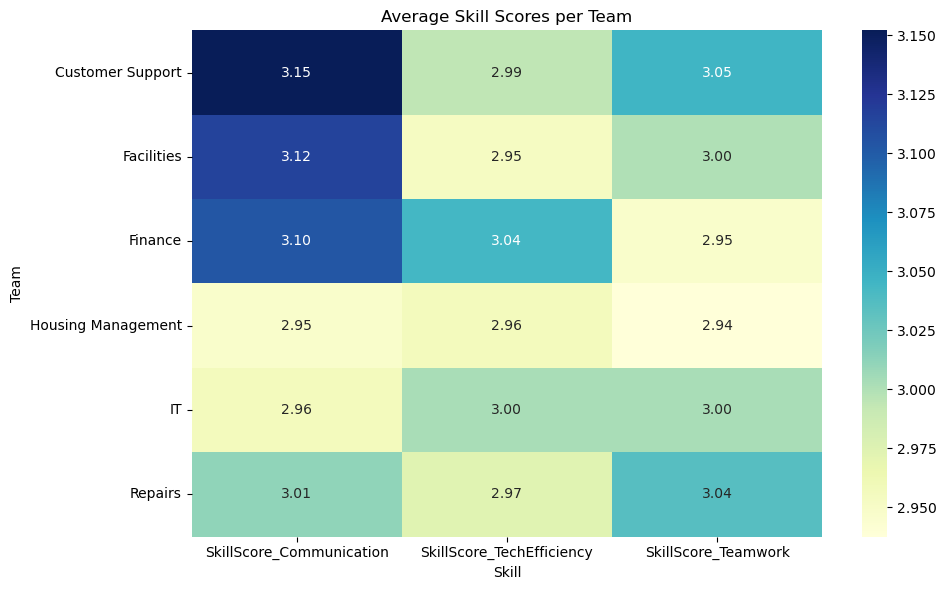

In [38]:
# Compute mean scores
heatmap_data = df.groupby('Teams')[['SkillScore_Communication', 'SkillScore_TechEfficiency', 'SkillScore_Teamwork']].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average Skill Scores per Team")
plt.xlabel("Skill")
plt.ylabel("Team")
plt.tight_layout()
plt.show()
